Практическое задание 4, стажировка, Cometa IT Bootcamp

Практическое задание заключается в следующем:

Прописать все свои хосты в инвентори-файле (файл скинуть в гитхаб).

Убедиться, что все хосты доступны с ansible-сервера путем использования модуля ping (скриншот приложить).

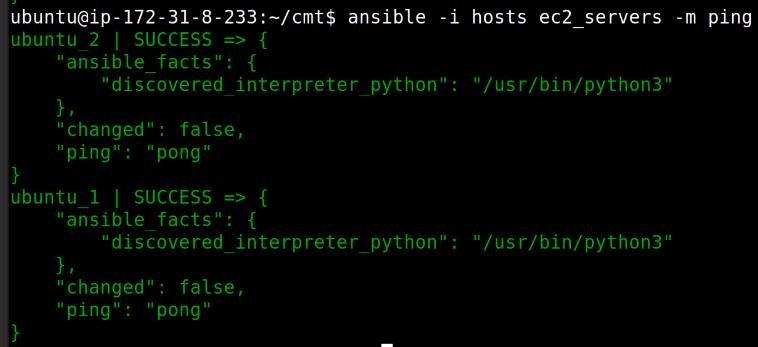

Написать несколько плейбуков (все плейбуки скинуть в гитхаб и снабдить комментариями):

3.1. Должен устанавливать веб-сервер nginx на хост, включать и запускать сервис nginx.

3.2. Копировать html-страницу (заранее приготовленную) в каталог веб-сервера на хост. По открытии айпи адреса хоста должна отображаться html-страница.

3.3. Должен устанавливать СУБД Postresql на хост, создаваться новая база и новый пользователь по имени OSCAR.

4. Установить докер на одной из EC2 инстанций. Установить SQL Developer (или любой клиент для работы с СУБД) на свой компьютер.
   
5. Установите образ Oracle Database 21c XE с DockerHub и запустите контейнер. Подключитесь к запущенной БД с помощью клиента и создайте несколько таблиц, заполните их данными, сделайте выборку из них. (приложите скриншоты)
   
6. Далее надо использовать написанное для предыдущей практики приложение (Написать простое приложение (по сути - API), которое должно отдавать информацию по HTTP). Напишите Dockerfile для сбора приложения в образ. Надо получить Docker image. Попробуйте из этого образа запустить контейнер. (скинуть Dockerfile, образ, приложить инструкцию по запуску образа).
